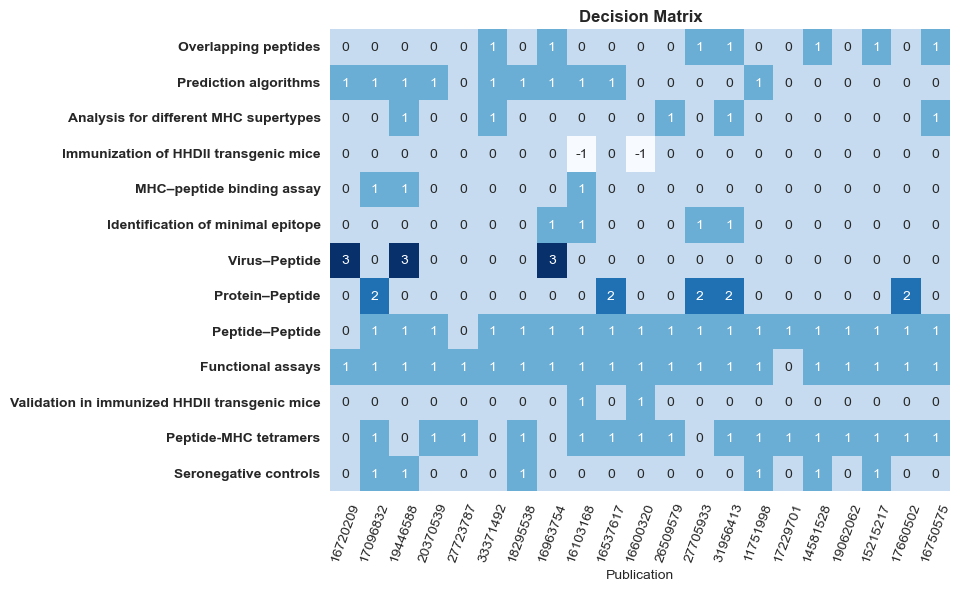

<Figure size 1000x600 with 0 Axes>

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in data from excel
df = pd.read_excel("Dataframe for decision matrix_publications.xlsx")

# Drop any rows with empty values
df.dropna(inplace=True)

# Create a decision matrix
data = df.iloc[:, 1:].T
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 10}, cbar=False, ax=ax)
ax.set_title("Decision Matrix", fontdict={'weight': 'bold'})
ax.set_xlabel("Publication")
ax.set_xticklabels(df["Publication"], rotation=70)
ax.tick_params(labelsize=10)
ylabels = ax.get_yticklabels()
for label in ylabels:
    label.set_weight("bold")
plt.figure(figsize=(10, 6))
plt.tight_layout()

plt.show()

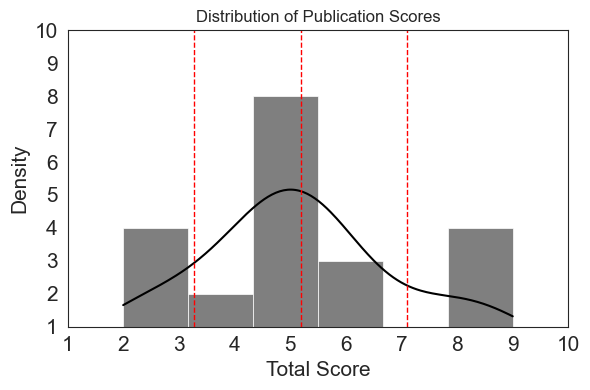

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read in data from excel
df = pd.read_excel("Dataframe for decision matrix_publications.xlsx")

# Drop any rows with empty values
df.dropna(inplace=True)

# calculate mean and standard deviation
mean = df["Total Score"].mean()
std = df["Total Score"].std()

# define cutoffs at 1 standard deviation above and below the mean
cutoffs = [mean - std, mean, mean + std]

# set the figure size and style
plt.figure(figsize=(6,4))
sns.set_style("white")

# plot the distribution of scores
sns.histplot(data=df, x="Total Score", kde=True, color="black", edgecolor="white", linewidth=0.5)

# plot vertical lines at the cutoffs
for cutoff in cutoffs:
    plt.axvline(x=cutoff, color='red', linestyle='--', linewidth=1)

# set the title and labels
plt.title("Distribution of Publication Scores", fontsize=12)
plt.xlabel("Total Score", fontsize=15)
plt.ylabel("Density", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# set the x-axis limits
plt.xlim([1, 10])
plt.ylim([1,10])

# adjust the plot layout
plt.tight_layout()

# show the plot
plt.show()

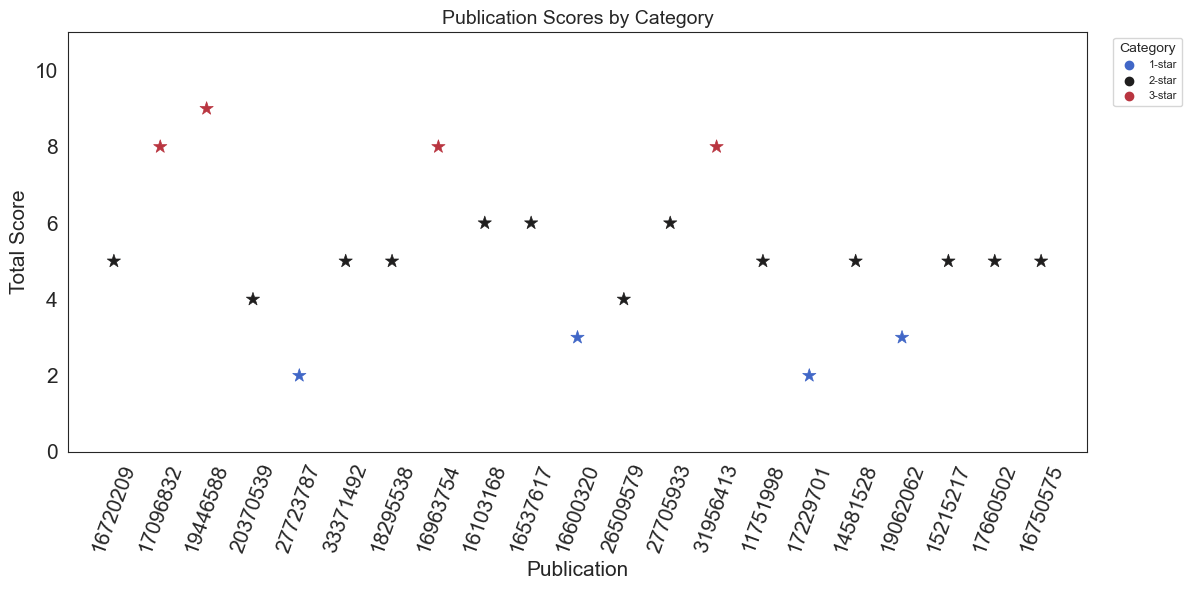

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data from excel
df = pd.read_excel("Dataframe for decision matrix_publications.xlsx")

# Drop any rows with empty values
df.dropna(inplace=True)

# define the cutoff scores for each category
cutoffs = [0, 3, 7, 10]

# define the labels for each category
labels = ['1-star', '2-star', '3-star']

# create a new column for the category labels
df['Category'] = pd.cut(df['Total Score'], bins=cutoffs, labels=labels, include_lowest=True)

# Set the figure size and style
plt.figure(figsize=(12, 6))
sns.set_style("white")

# Plot a scatter with different colors for each category
scatter = sns.scatterplot(data=df, x=df.index, y='Total Score', hue='Category', palette='icefire', s=100, linewidth=0.5, edgecolor=None, marker='*')

# Set x-axis tick positions and labels
plt.xticks(ticks=df.index, labels=df['Publication'], rotation=70, fontsize=8)

# Set the title, labels, and legend
plt.title('Publication Scores by Category', fontsize=14)
plt.xlabel('Publication', fontsize=15)
plt.ylabel('Total Score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title='Category', loc='upper left', fontsize=8, bbox_to_anchor=(1.02, 1))

# Set the y-axis limits
plt.ylim([0, 11])  # Adjusted y-axis limits for 'Total Score'

# Adjust the plot layout
plt.tight_layout()

# Show the plot
plt.show()